<a href="https://colab.research.google.com/github/DiegoCorona/TensorFlow2-for-Deep-Learning/blob/main/Week2_Tensorflow2_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
        Dense(10, input_shape = (20,)),
        Dense(64, activation= 'relu', name = 'layer_1'),
        Dense(10, activation= 'softmax')
])

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
layer_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,564
Trainable params: 1,564
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model_cnn = Sequential([
                    Conv2D(16, (3,3), activation= 'relu', 
                           input_shape = (28,28, 1),
                           padding = 'SAME', 
                           strides = 2), ## el '1' es para imagenes blanco y negro
                                         ## padding agrega ceros a los lados para tener la misam dimension
                                         ## strides son los saltos que da el filtro
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation= 'softmax')
])

In [7]:
# Print the model summary
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate= 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model_cnn.compile(optimizer= opt, ## 'adam', 'SGD'
                  loss = 'sparce_categorical_crossentropy',
                  metrics = [acc, mae])

In [9]:
# Print the resulting model attributes
print(model_cnn.loss)
print(model_cnn.optimizer)
print(model_cnn.metrics)
print(model_cnn.optimizer.lr)

sparce_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
model_cnn = Sequential([
                    Conv2D(16, (3,3), activation= 'relu', input_shape = (28,28, 1), padding = 'SAME', strides = 2),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation= 'softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate= 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
losse = tf.keras.losses.SparseCategoricalCrossentropy()

model_cnn.compile(optimizer= opt, ## 'adam', 'SGD'
                  loss = losse,
                  metrics = [acc, mae])

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(test_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255
test_images = test_images/255

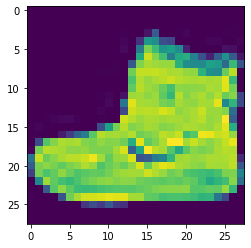

 label: Ankle boot


In [15]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f" label: {labels[train_labels[i]]}")

#### Fit the model

In [16]:
# Fit the model

history = model_cnn.fit(train_images[..., np.newaxis], train_labels, epochs= 8, batch_size= 256) ## verbose 'ver detalles del entrenamiento

Epoch 1/8
235/235 [==============================] - 5s 18ms/step - loss: 1.1263 - sparse_categorical_accuracy: 0.6105 - mean_absolute_error: 4.4161
Epoch 2/8
235/235 [==============================] - 4s 17ms/step - loss: 0.4980 - sparse_categorical_accuracy: 0.8206 - mean_absolute_error: 4.4464
Epoch 3/8
235/235 [==============================] - 4s 18ms/step - loss: 0.4482 - sparse_categorical_accuracy: 0.8411 - mean_absolute_error: 4.4163
Epoch 4/8
235/235 [==============================] - 4s 18ms/step - loss: 0.4317 - sparse_categorical_accuracy: 0.8431 - mean_absolute_error: 4.4065
Epoch 5/8
235/235 [==============================] - 4s 18ms/step - loss: 0.4099 - sparse_categorical_accuracy: 0.8522 - mean_absolute_error: 4.4167
Epoch 6/8
235/235 [==============================] - 4s 18ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.8569 - mean_absolute_error: 4.4297
Epoch 7/8
235/235 [==============================] - 4s 18ms/step - loss: 0.3845 - sparse_categorical_accu

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.771781,0.726933,4.420001
1,0.485841,0.825867,4.420001
2,0.442624,0.842100,4.420000
3,0.420320,0.848333,4.420000
4,0.406150,0.853883,4.420000
5,0.397014,0.855717,4.419999
6,0.387387,0.858967,4.420001
7,0.383743,0.860133,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

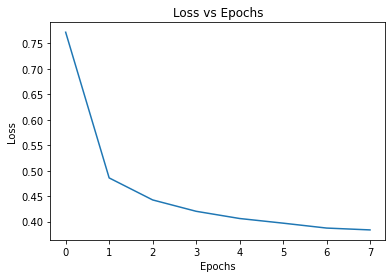

In [18]:
# Make a plot for the loss
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')


[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

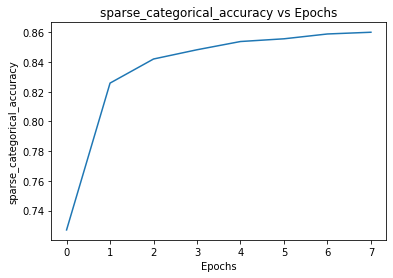

In [19]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y = 'sparse_categorical_accuracy', title = 'sparse_categorical_accuracy vs Epochs', legend = False)
accuracy_plot.set(xlabel = 'Epochs', ylabel = 'sparse_categorical_accuracy')

[Text(0, 0.5, 'mean_absolute_error'), Text(0.5, 0, 'Epochs')]

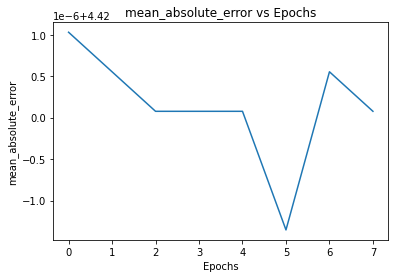

In [20]:
# Make a plot for the additional metric

metric_plot = df.plot(y = 'mean_absolute_error', title = 'mean_absolute_error vs Epochs', legend = False)
metric_plot.set(xlabel = 'Epochs', ylabel = 'mean_absolute_error')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [28]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model_cnn.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2) ## verbose = 2  (resumen de metricas)

313/313 - 1s - loss: 0.4226 - sparse_categorical_accuracy: 0.8450 - mean_absolute_error: 4.4200


#### Make predictions from the model

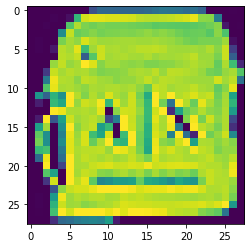

Label: Bag


In [39]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [40]:
# Get the model predictions
prediction = model_cnn.predict(test_image[np.newaxis, ..., np.newaxis]) ## Se agregan dos dimensiones ficticias
print(f'Model prediction: {labels[np.argmax(prediction)]}')

Model prediction: Bag
